In [265]:
# Importing Dependencies and Setup
# We don't know what we need, so we'll import a bunch of different modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

In [266]:
# Load CSV file and turn it into PD DataFrames
goOne_df = pd.read_csv("Resources/goemotions_1.csv")
goTwo_df = pd.read_csv("Resources/goemotions_2.csv")
goThree_df = pd.read_csv("Resources/goemotions_3.csv")

In [267]:
# Merge the three separate DataFrames into one.
dfMerge = goOne_df.merge(goTwo_df, how='outer')
dfMerge = dfMerge.merge(goThree_df, how='outer')

# Convert column into DateTime datatype, and apply the correct unit (seconds) to turn it readable.
dfMerge['created_utc'] = dfMerge['created_utc'].astype('datetime64[s]')
dfMerge

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,2019-01-21 15:22:49,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,2019-01-02 11:15:44,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,2019-01-05 06:10:01,2,False,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,2019-01-16 10:25:22,16,False,0,...,1,0,0,0,0,0,0,0,0,0
211221,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,2019-01-27 01:39:42,15,False,0,...,0,0,0,0,0,0,0,0,0,0
211222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,2019-01-17 00:08:54,70,False,1,...,0,0,0,0,0,0,0,0,0,0
211223,The FDA has plenty to criticize. But like here...,edrhoxh,enamedata,medicine,t3_aejqzd,t1_edrgdtx,2019-01-11 01:07:12,4,False,0,...,0,0,0,0,0,0,0,0,0,0


In [268]:
# Clean DataFrame by: 1.# Dropping columns, 2.) Choosing "Clear" selections, 3.) Dropping the "example_very_unclear" column after selection
dfStaging = dfMerge.drop(columns=['id', 'author', 'link_id', 'parent_id'])
dfStagingA = dfStaging.loc[(dfStaging['example_very_unclear'] == False)]
dfClean = dfStagingA.drop(columns=['example_very_unclear'])
dfClean
# dfClean will have "clear" examples

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,nrl,2019-01-25 01:50:39,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"You do right, if you don't care then fuck 'em!",confessions,2019-01-02 11:15:44,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,facepalm,2019-01-20 06:17:34,18,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,2019-01-05 06:10:01,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Right? Considering it’s such an important docu...,TrueReddit,2019-01-23 21:50:08,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,"Well, I'm glad you're out of all that now. How...",raisedbynarcissists,2019-01-04 15:22:34,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211220,Everyone likes [NAME].,heroesofthestorm,2019-01-16 10:25:22,16,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
211221,Well when you’ve imported about a gazillion of...,nottheonion,2019-01-27 01:39:42,15,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
211222,That looks amazing,shittyfoodporn,2019-01-17 00:08:54,70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
# Clean DataFrame by: 1.# Dropping columns, 2.) Choosing "Unclear" selections, 3.) Dropping the "example_very_unclear" column after selection
# Same as above; 
dfStagingB = dfStaging.loc[(dfStaging['example_very_unclear'] == True)]
dfEVUClean = dfStagingB.drop(columns=['example_very_unclear'])
dfEVUClean
# dfEVUClean will have "unclear" examples

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
1,>sexuality shouldn’t be a grouping category I...,unpopularopinion,2019-01-21 15:22:49,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,Oi us cancers don’t want him either! We respec...,Justfuckmyshitup,2019-01-13 22:13:56,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,I unfortunately can not afford a lawyer. Lucki...,Divorce,2019-01-01 17:28:15,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,OMG THOSE TINY SHOES! *desire to boop snoot in...,chicago,2019-01-20 05:36:33,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,I would pay money for [NAME] to not be my nurs...,SoulCalibur,2019-01-17 03:50:29,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211037,_____ is ruining _____ because kids these days.,moviescirclejerk,2019-01-10 23:51:59,57,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211082,"yea I agree, and [NAME] is way younger so has ...",Dodgers,2019-01-04 22:09:22,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211113,"Huh, assumed he was more of a grindr fella .....",90dayfianceuncensored,2019-01-30 23:05:53,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211214,Well when you’ve imported about a gazillion of...,nottheonion,2019-01-27 01:39:42,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
dfEVUTrue = dfMerge.loc[dfMerge['example_very_unclear'] == True]

In [271]:
dfEmotions = dfClean

In [272]:
# applying Numpy.select to the clean dataframe which will scan selected columns based on conditions and output the sentiments for each emotion selected
emo_conditions = [
    (dfEmotions['amusement'] == 1),
    (dfEmotions['excitement'] == 1),
    (dfEmotions['joy'] == 1),
    (dfEmotions['love'] == 1),
    (dfEmotions['desire'] == 1),
    (dfEmotions['optimism'] == 1),
    (dfEmotions['caring'] == 1),
    (dfEmotions['pride'] == 1),
    (dfEmotions['admiration'] == 1),
    (dfEmotions['gratitude'] == 1),
    (dfEmotions['relief'] == 1),
    (dfEmotions['approval'] == 1),
    (dfEmotions['realization'] == 1),
    (dfEmotions['surprise'] == 1),
    (dfEmotions['curiosity'] == 1),
    (dfEmotions['confusion'] == 1),
    (dfEmotions['fear'] == 1),
    (dfEmotions['nervousness'] == 1),
    (dfEmotions['remorse'] == 1),
    (dfEmotions['embarrassment'] == 1),
    (dfEmotions['disappointment'] == 1),
    (dfEmotions['sadness'] == 1),
    (dfEmotions['grief'] == 1),
    (dfEmotions['disgust'] == 1),
    (dfEmotions['anger'] == 1),
    (dfEmotions['annoyance'] == 1),
    (dfEmotions['disapproval'] == 1),
    (dfEmotions['neutral'] == 1)
]

sentiments = ['Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
              'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
               'Ambiguous', 'Ambiguous','Ambiguous','Ambiguous',
               'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
               'Negative', 'Negative', 'Negative', 'Negative', 'Neutral']

dfEmotions['Sentiment'] = np.select(emo_conditions, sentiments)
dfEmotions.head(50)

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,Sentiment
0,That game hurt.,nrl,2019-01-25 01:50:39,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Negative
2,"You do right, if you don't care then fuck 'em!",confessions,2019-01-02 11:15:44,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Neutral
3,Man I love reddit.,facepalm,2019-01-20 06:17:34,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,2019-01-05 06:10:01,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Neutral
5,Right? Considering it’s such an important docu...,TrueReddit,2019-01-23 21:50:08,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
6,"He isn't as big, but he's still quite popular....",cringe,2019-01-01 05:21:16,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
7,That's crazy; I went to a super [RELIGION] hig...,TeenMomOGandTeenMom2,2019-01-03 17:22:38,23,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
8,that's adorable asf,traaaaaaannnnnnnnnns,2019-01-29 12:05:43,73,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
9,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",youtubehaiku,2019-01-08 21:38:34,54,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
10,"I have, and now that you mention it, I think t...",AskMenOver30,2019-01-05 03:17:43,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Neutral


The rated emotions and their corresponding sentiments are as such:
 -------------------------------------------------- 
 Positive     82938
Neutral      55298
Negative     45991
Ambiguous    23587
Name: Sentiment, dtype: int64


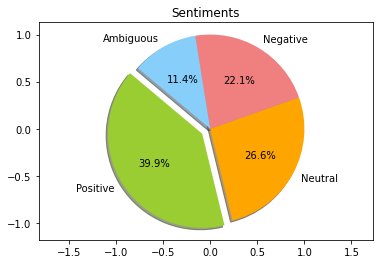

In [273]:
# Create list as variables for pie chart to dispay proportions of sentiments
sentiment_list = ["Positive", "Neutral", "Negative", "Ambiguous"]
sentiment_tally = [82938, 55298, 45991, 23587]
colors = ["yellowgreen", "orange", "lightcoral", "lightskyblue"]
explode = (0.1, 0, 0, 0)

# Create a pie chart using matplotlib based on the above data
sentiment_count = dfEmotions['Sentiment'].value_counts()
print("The rated emotions and their corresponding sentiments are as such:\n", 
"--------------------------------------------------","\n",
sentiment_count)
plt.pie(sentiment_count, explode=explode, labels=sentiment_list, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, frame=True)
plt.title("Sentiments")
plt.axis("equal")
plt.savefig("Resources/SentimentsPie.png")
plt.show()

In [274]:
# Adding another column to display the emotion chosen by the rater
emo_map_yin = [
    (dfEmotions['amusement'] == 1),
    (dfEmotions['excitement'] == 1),
    (dfEmotions['joy'] == 1),
    (dfEmotions['love'] == 1),
    (dfEmotions['desire'] == 1),
    (dfEmotions['optimism'] == 1),
    (dfEmotions['caring'] == 1),
    (dfEmotions['pride'] == 1),
    (dfEmotions['admiration'] == 1),
    (dfEmotions['gratitude'] == 1),
    (dfEmotions['relief'] == 1),
    (dfEmotions['approval'] == 1),
    (dfEmotions['realization'] == 1),
    (dfEmotions['surprise'] == 1),
    (dfEmotions['curiosity'] == 1),
    (dfEmotions['confusion'] == 1),
    (dfEmotions['fear'] == 1),
    (dfEmotions['nervousness'] == 1),
    (dfEmotions['remorse'] == 1),
    (dfEmotions['embarrassment'] == 1),
    (dfEmotions['disappointment'] == 1),
    (dfEmotions['sadness'] == 1),
    (dfEmotions['grief'] == 1),
    (dfEmotions['disgust'] == 1),
    (dfEmotions['anger'] == 1),
    (dfEmotions['annoyance'] == 1),
    (dfEmotions['disapproval'] == 1),
    (dfEmotions['neutral'] == 1)
]

emo_map_yang = ['Amusement', 'Excitement', 'Joy', 'Love', 'Desire', 'Optimism', 'Caring',
              'Pride', 'Admiration', 'Gratitude', 'Relief', 'Approval',
               'Realization', 'Surprise','Curiosity','Confusion',
               'Fear', 'Nervousness', 'Remorse', 'Embarrassment', 'Disappointment', 'Sadness', 'Grief',
               'Disgust', 'Anger', 'Annoyance', 'Disapproval', 'Neutral']
dfEmotions['Emotion'] = np.select(emo_map_yin, emo_map_yang)
dfEmotions.head()

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,Sentiment,Emotion
0,That game hurt.,nrl,2019-01-25 01:50:39,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,Negative,Sadness
2,"You do right, if you don't care then fuck 'em!",confessions,2019-01-02 11:15:44,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Neutral,Neutral
3,Man I love reddit.,facepalm,2019-01-20 06:17:34,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Love
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,2019-01-05 06:10:01,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Neutral,Neutral
5,Right? Considering it’s such an important docu...,TrueReddit,2019-01-23 21:50:08,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Gratitude


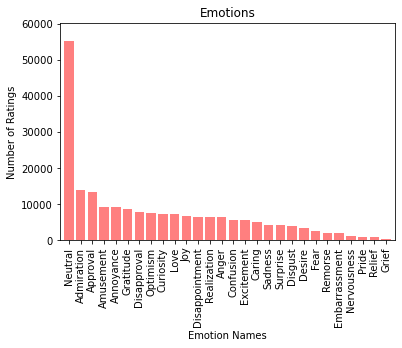

In [275]:
# Find the number of ratings for all emotions rated (including neutral ratings)
emotion_count = dfEmotions['Emotion'].value_counts()
# emotion_count = pd.DataFrame(emotion_count)

# Situate the 'emotion_count' dataframe into a bar chart
x_axis = np.arange(len(emotion_count)) 
plt.bar(x_axis, emotion_count, color='r', alpha=0.5, align="center")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(emotion_count)+5000)
plt.title("Emotions")
plt.xlabel("Emotion Names")
plt.ylabel("Number of Ratings")  
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Neutral', 'Admiration', 'Approval', 'Amusement', 'Annoyance', 'Gratitude', 'Disapproval',
              'Optimism', 'Curiosity', 'Love', 'Joy', 'Disappointment',
               'Realization', 'Anger','Confusion','Excitement',
               'Caring', 'Sadness', 'Surprise', 'Disgust', 'Desire', 'Fear', 'Remorse',
               'Embarrassment', 'Nervousness', 'Pride', 'Relief', 'Grief'])
plt.xticks(rotation = 90)
plt.show()

In [276]:
print(dfEmotions.Emotion.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Neutral           26.6%
Admiration         6.8%
Approval           6.4%
Amusement          4.4%
Annoyance          4.4%
Gratitude          4.2%
Disapproval        3.7%
Optimism           3.6%
Curiosity          3.5%
Love               3.5%
Joy                3.3%
Disappointment     3.1%
Realization        3.1%
Anger              3.1%
Confusion          2.7%
Excitement         2.6%
Caring             2.4%
Sadness            2.0%
Surprise           2.0%
Disgust            1.9%
Desire             1.7%
Fear               1.3%
Remorse            0.9%
Embarrassment      0.9%
Nervousness        0.5%
Pride              0.5%
Relief             0.5%
Grief              0.2%
Name: Emotion, dtype: object


### ========= Q4: Merging Subreddit Grouping to DataFrame =========

Amount | Subgroup          | Content Description        |
----------- | -----------       | -----------           |
77          | Discussion        | General discussion    |
64          | Sports            | Relating to sports    |
63          | Emotive           | Aimed to evoke specific emotion   |
63          | Identity          | Relating to a specific identity   |
49          | Games             | Relating to a games   |
46          | Regional          | Relating to a specific region     |
41          | Politics          | Relating to political subject     |
36          | Television Movie  | Relating to TV or movie           |
17          | Relationship      | Relating to rom./ pla. relationship |
15          | Digital Media | General digital media content         |

*In other words 63 subreddits are tagged with identity and their contents is primarily dependent with a specific identity; e.g., age, sexuality, occupation or otherwise.*

### ==================================================






In [277]:
# Importing "CountsSubredditCat.csv" into a DataFrame, check pathing for errors!
SubredditCatDF = pd.read_csv("Resources/CountsSubredditCat.csv")

# Clean by dropping columns and renaming
SubredditCatClean = SubredditCatDF.drop(columns = ['Subscribers', 'Responses','Notes', '77', 'Discussion', '"General" discussion'])
SubredditCatClean.rename(columns={"Subreddit": "subreddit"}, inplace=True)
SubredditCatClean

,subreddit,Grouping
0,cringe,emotive
1,loveafterlockup,television movie
2,socialanxiety,discussion
3,AnimalsBeingBros,emotive
4,OkCupid,relationship
...,...,...
478,hawks,sports
479,Anticonsumption,discussion
480,SSBM,games
481,shieldbro,television movie


In [278]:
# Merge cleaned catDataFrame into main DataFrame
dfCleanStaging = dfEmotions.merge(SubredditCatClean)

# Dropping Emotion matrix as we have their emotion listed under "Emotion" column.
dfCleanStagingA = dfCleanStaging.drop(columns = ['amusement', 'excitement', 'joy', 'love', 'desire', 'optimism', 'caring',\
                                                'pride', 'admiration', 'gratitude', 'relief', 'approval',\
                                                'realization', 'surprise','curiosity','confusion',\
                                                'fear', 'nervousness', 'remorse', 'embarrassment', 'disappointment', 'sadness', 'grief',\
                                                'disgust', 'anger', 'annoyance', 'disapproval', 'neutral'])

# Rearranging columns by placing subreddit next to subgroup
dfCleanStagingB = dfCleanStagingA[['text', 'subreddit', 'Grouping', 'created_utc', 'rater_id', 'Sentiment', 'Emotion']]

# Renaming titles for readability
dfCleanStagingB.rename(columns = {"text":"Text", "subreddit": "Subreddit", "Grouping":"Group", "created_utc":"UTC", "rater_id":"Rater ID"}, inplace=True)
dfCleanStagingB

,Text,Subreddit,Group,UTC,Rater ID,Sentiment,Emotion
0,That game hurt.,nrl,sports,2019-01-25 01:50:39,1,Negative,Sadness
1,My fans on patreon will be rewarded soon,nrl,sports,2019-01-29 07:24:40,33,Neutral,Neutral
2,Lets see how [NAME] goes in Round 6,nrl,sports,2019-01-15 23:34:30,49,Neutral,Neutral
3,Apparently lots,nrl,sports,2019-01-30 21:48:09,35,Neutral,Neutral
4,Support the Sydney ~~Blues~~ Sixers. Loved tha...,nrl,sports,2019-01-16 23:15:46,18,Positive,Excitement
...,...,...,...,...,...,...,...
207320,"Sadly, yes. You'll only be able to craft weapo...",farcry,games,2019-01-23 19:33:09,62,Negative,Sadness
207321,no its amazing.,farcry,games,2019-01-25 13:45:25,23,Positive,Joy
207322,This should be of interest to you. -,farcry,games,2019-01-11 10:49:44,51,Neutral,Neutral
207323,"I don't know, they'd have to reduce the accura...",farcry,games,2019-01-24 10:15:12,52,Neutral,Neutral


In [279]:
# Port into dfCleanCat; DataFrame, Cleaned, Categorized
dfCleanCat = dfCleanStagingB.iloc[:, [0,1,2,3,4,6,5]]

# Show representation of each grouping by %; we can generally expect higher representation from bigger groups.
print(dfCleanCat.Group.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
dfCleanCat.head(10)

discussion          16.8%
emotive             15.6%
identity            13.6%
sports              13.4%
politics             9.2%
regional             7.9%
television movie     7.7%
games                7.7%
relationship         4.2%
digital media        2.9%
finance              0.7%
drugs                0.3%
Name: Group, dtype: object


,Text,Subreddit,Group,UTC,Rater ID,Emotion,Sentiment
0,That game hurt.,nrl,sports,2019-01-25 01:50:39,1,Sadness,Negative
1,My fans on patreon will be rewarded soon,nrl,sports,2019-01-29 07:24:40,33,Neutral,Neutral
2,Lets see how [NAME] goes in Round 6,nrl,sports,2019-01-15 23:34:30,49,Neutral,Neutral
3,Apparently lots,nrl,sports,2019-01-30 21:48:09,35,Neutral,Neutral
4,Support the Sydney ~~Blues~~ Sixers. Loved tha...,nrl,sports,2019-01-16 23:15:46,18,Excitement,Positive
5,"Yeah, obviously. But that the joke relies on c...",nrl,sports,2019-01-21 10:03:17,24,Approval,Positive
6,maybe post the article since it's already out lol,nrl,sports,2019-01-31 06:04:45,26,Amusement,Positive
7,*Unfortunately that’s the world we live in now...,nrl,sports,2019-01-09 01:19:25,36,Neutral,Neutral
8,its ok i understood,nrl,sports,2019-01-16 04:49:09,37,Approval,Positive
9,That's the longest dimple I've ever seen>,nrl,sports,2019-01-05 00:50:28,55,Amusement,Positive


From the "value_counts" above we can see that:

*Discussion*, *Emotive*, *Identity* and *Sports* make up for 59.4% of our entries. <br />
*Politics*, *Regional*, *Television-movie* and *Games* make up for 32.5% of our entries; combined these 8 groups compromise for 91.9%. <br />
*Relationship*, *digital media*, *finance* and *drugs* make up the remainder 8.1%. <br />

In [263]:
# Create a DF for "Identity" group
IdentityDF = dfCleanCat.loc[(dfCleanCat['Group'] == 'identity'), :]
# !! Be sure to update ['subgroup'] == 'xyz' !! 
IdentityDF.reset_index(inplace=True)

# Quick % check on emotional representation for "Identity" group
print(IdentityDF.Emotion.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# Quick % check on sentimental representation
print(IdentityDF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

# Show DF head
IdentityDF.head()

Neutral           24.0%
Admiration         7.2%
Approval           6.5%
Gratitude          6.2%
Amusement          4.4%
Love               4.3%
Optimism           4.0%
Annoyance          3.9%
Joy                3.9%
Disapproval        3.3%
Curiosity          3.2%
Caring             3.1%
Realization        2.9%
Excitement         2.8%
Disappointment     2.7%
Anger              2.6%
Confusion          2.5%
Sadness            2.1%
Desire             1.9%
Disgust            1.8%
Surprise           1.7%
Fear               1.4%
Remorse            1.0%
Embarrassment      0.9%
Pride              0.6%
Nervousness        0.5%
Relief             0.4%
Grief              0.1%
Name: Emotion, dtype: object
Positive     45.3%
Neutral      24.0%
Negative     20.4%
Ambiguous    10.3%
Name: Sentiment, dtype: object


,index,Text,Subreddit,Group,UTC,Rater ID,Emotion,Sentiment
0,4201,that's adorable asf,traaaaaaannnnnnnnnns,identity,2019-01-29 12:05:43,73,Amusement,Positive
1,4202,love you comrade! <3 you should get a cool fla...,traaaaaaannnnnnnnnns,identity,2019-01-17 06:15:54,26,Love,Positive
2,4203,"OH DARN IT, THANKS FOR THE REMINDER MFER!!!",traaaaaaannnnnnnnnns,identity,2019-01-22 01:05:14,37,Anger,Negative
3,4204,It did! Good luck on yours!! -[NAME],traaaaaaannnnnnnnnns,identity,2019-01-21 23:00:25,4,Approval,Positive
4,4205,Apple can still go kindly fuck itself tho,traaaaaaannnnnnnnnns,identity,2019-01-31 04:58:16,3,Annoyance,Negative


In [264]:
# Create a DF for "Discussion" group
DiscussionDF = dfCleanCat.loc[(dfCleanCat['Group'] == 'discussion'), :]
# !! Be sure to update ['subgroup'] == 'xyz' !! 
DiscussionDF.reset_index(inplace=True)

# Quick % check on emotional representation for "Discussion" group
print(DiscussionDF.Emotion.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# Quick % check on sentimental representation
print(DiscussionDF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

# Show DF head
DiscussionDF.head()

Neutral           24.9%
Approval           6.8%
Admiration         6.0%
Gratitude          5.1%
Amusement          4.5%
Annoyance          4.5%
Optimism           4.0%
Disapproval        3.7%
Caring             3.6%
Curiosity          3.5%
Joy                3.4%
Realization        3.1%
Disappointment     3.0%
Love               3.0%
Anger              3.0%
Confusion          2.6%
Excitement         2.3%
Sadness            2.3%
Disgust            1.9%
Surprise           1.7%
Desire             1.6%
Fear               1.3%
Remorse            1.1%
Embarrassment      1.1%
Nervousness        0.6%
Relief             0.6%
Pride              0.6%
Grief              0.2%
Name: Emotion, dtype: object
Positive     41.4%
Neutral      24.9%
Negative     22.8%
Ambiguous    10.9%
Name: Sentiment, dtype: object


,index,Text,Subreddit,Group,UTC,Rater ID,Emotion,Sentiment
0,387,"You do right, if you don't care then fuck 'em!",confessions,discussion,2019-01-02 11:15:44,37,Neutral,Neutral
1,388,"AWWWWW, look at the little snowflake that can’...",confessions,discussion,2019-01-27 23:33:25,60,Annoyance,Negative
2,389,Can you snap a picture of that pinky in your b...,confessions,discussion,2019-01-12 19:15:50,72,Curiosity,Ambiguous
3,390,Sounds like a great way to accidentally fuckin...,confessions,discussion,2019-01-28 06:43:16,26,Disapproval,Negative
4,391,If someone calls I will text them and say I ca...,confessions,discussion,2019-01-06 21:12:47,61,Optimism,Positive


In [214]:
# Create a DF for "Sport" group
SportDF = dfCleanCat.loc[(dfCleanCat['Group'] == 'sports'), :]
# !! Be sure to update ['subgroup'] == 'xyz' !! 
SportDF.reset_index(inplace=True)

# Quick % check on emotional representation for "Sport" group
print(SportDF.Emotion.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# Quick % check on sentimental representation
print(SportDF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

# Show DF head
SportDF.head()

Neutral           28.6%
Admiration         7.2%
Approval           5.7%
Amusement          4.7%
Optimism           4.3%
Annoyance          4.2%
Love               4.0%
Disappointment     3.7%
Disapproval        3.7%
Joy                3.5%
Excitement         3.2%
Curiosity          3.1%
Anger              3.0%
Realization        2.8%
Gratitude          2.5%
Confusion          2.3%
Surprise           2.0%
Sadness            1.9%
Desire             1.9%
Disgust            1.8%
Caring             1.6%
Fear               1.0%
Embarrassment      0.8%
Remorse            0.8%
Pride              0.7%
Nervousness        0.5%
Relief             0.5%
Grief              0.1%
Name: Emotion, dtype: object
Positive     39.6%
Neutral      28.6%
Negative     21.6%
Ambiguous    10.2%
Name: Sentiment, dtype: object


,index,Text,Subreddit,Group,UTC,Rater ID,Emotion,Sentiment
0,0,That game hurt.,nrl,sports,2019-01-25 01:50:39,1,Sadness,Negative
1,1,My fans on patreon will be rewarded soon,nrl,sports,2019-01-29 07:24:40,33,Neutral,Neutral
2,2,Lets see how [NAME] goes in Round 6,nrl,sports,2019-01-15 23:34:30,49,Neutral,Neutral
3,3,Apparently lots,nrl,sports,2019-01-30 21:48:09,35,Neutral,Neutral
4,4,Support the Sydney ~~Blues~~ Sixers. Loved tha...,nrl,sports,2019-01-16 23:15:46,18,Excitement,Positive


In [215]:
# Create a DF for "Emotive" group
EmotiveDF = dfCleanCat.loc[(dfCleanCat['Group'] == 'emotive'), :]
# !! Be sure to update ['subgroup'] == 'xyz' !! 
EmotiveDF.reset_index(inplace=True)

# Quick % check on emotional representation for "Emotive" group
print(EmotiveDF.Emotion.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# Quick % check on sentimental representation
print(EmotiveDF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

# Show DF head
EmotiveDF.head()

Neutral           27.6%
Admiration         6.8%
Approval           6.0%
Amusement          5.0%
Annoyance          4.6%
Curiosity          3.7%
Disapproval        3.6%
Realization        3.6%
Love               3.5%
Anger              3.4%
Disappointment     3.0%
Joy                2.9%
Confusion          2.8%
Gratitude          2.8%
Optimism           2.5%
Sadness            2.5%
Excitement         2.4%
Surprise           2.3%
Disgust            2.3%
Caring             2.0%
Fear               1.6%
Desire             1.5%
Embarrassment      1.0%
Remorse            0.9%
Nervousness        0.6%
Relief             0.5%
Pride              0.4%
Grief              0.2%
Name: Emotion, dtype: object
Positive     36.3%
Neutral      27.6%
Negative     23.7%
Ambiguous    12.4%
Name: Sentiment, dtype: object


,index,Text,Subreddit,Group,UTC,Rater ID,Emotion,Sentiment
0,1170,Man I love reddit.,facepalm,emotive,2019-01-20 06:17:34,18,Love,Positive
1,1171,"""You may die, but it's a sacrifice I'm willing...",facepalm,emotive,2019-01-25 14:12:45,61,Optimism,Positive
2,1172,"The service made it 20 years ago (1999, yeah i...",facepalm,emotive,2019-01-03 14:33:08,37,Curiosity,Ambiguous
3,1173,Of course he will lie cheat and steal to make ...,facepalm,emotive,2019-01-10 00:06:07,2,Embarrassment,Negative
4,1174,"Good dad, manipulative son.",facepalm,emotive,2019-01-17 00:59:00,16,Admiration,Positive


### Attempting to plot data
The x-axis ticks are for both graphs are incorrect, certain emotions placed higher in certain groups and graph will need to adjust for each group according 
- ('Optimism' is 5th most represented in Sports group, whereas has 'Annoyance' is 5th most represented in Emotive group)
Might need a different sort of plot altogether, but not sure how we can represent up to 12 different groups in other graphs

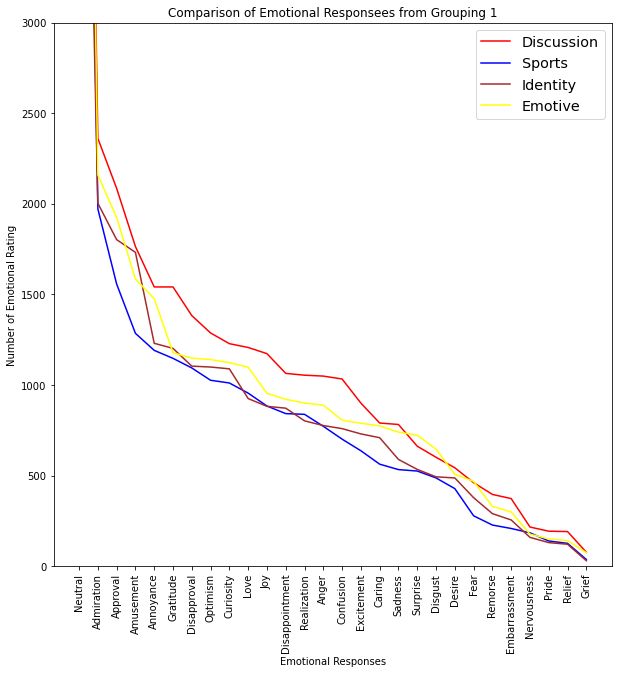

In [216]:
# Grabbing Emotion for the first major group (Discussion, Sports, Emotive, Identity)
# Will attempt to make this into a line chart 
DiscussionECount = DiscussionDF['Emotion'].value_counts() # Y-axis 
SportECount = SportDF['Emotion'].value_counts() 
IdentityECount = IdentityDF['Emotion'].value_counts()
EmotiveECount = EmotiveDF['Emotion'].value_counts()

# Plotting
x_axis = np.arange(len(DiscussionECount)) 
tick_locations = [value for value in x_axis]
figGroupOneE, axGroupOneE = plt.subplots(figsize=(10,10))
axGroupOneE.plot(x_axis, DiscussionECount, label='Discussion', c='red')
axGroupOneE.plot(x_axis, SportECount, label='Sports', c='blue')
axGroupOneE.plot(x_axis, IdentityECount, label='Identity', c='brown')
axGroupOneE.plot(x_axis, EmotiveECount, label='Emotive', c='yellow')
legendGroupOneE = axGroupOneE.legend(loc='best', fontsize='x-large')
plt.ylim(0, 3000)
plt.xlabel('Emotional Responses')
plt.ylabel('Number of Emotional Rating')
plt.title('Comparison of Emotional Responsees from Grouping 1')
plt.xticks(tick_locations, ['Neutral', 'Admiration', 'Approval', 'Amusement', 'Annoyance', 'Gratitude', 'Disapproval',
              'Optimism', 'Curiosity', 'Love', 'Joy', 'Disappointment',
               'Realization', 'Anger','Confusion','Excitement',
               'Caring', 'Sadness', 'Surprise', 'Disgust', 'Desire', 'Fear', 'Remorse',
               'Embarrassment', 'Nervousness', 'Pride', 'Relief', 'Grief'], rotation='vertical')
plt.show()

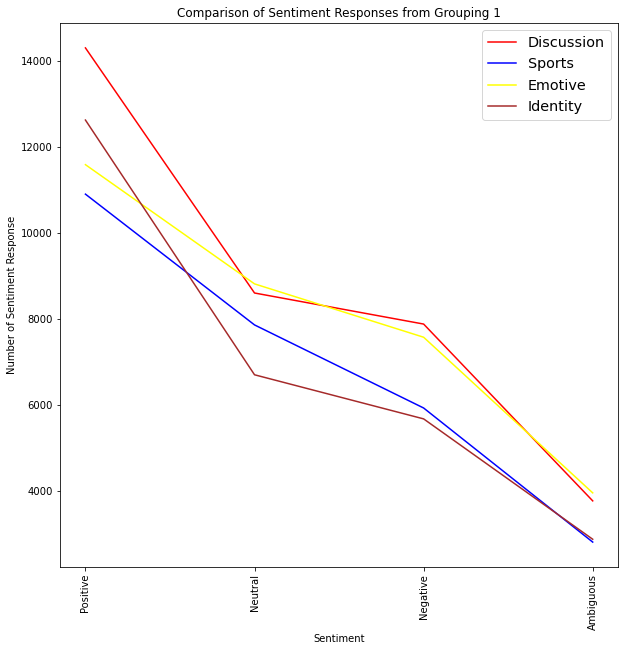

In [217]:
# Grabbing Sentiment for the first major group 
DiscussionSCount = DiscussionDF.Sentiment.value_counts() 
SportSCount = SportDF.Sentiment.value_counts() 
EmotiveSCount = EmotiveDF.Sentiment.value_counts() 
IdentitySCount = IdentityDF.Sentiment.value_counts() 

# Plotting
# Defining x-axis and tick locations
x_axis = np.arange(len(DiscussionSCount)) 
tick_locations = [value for value in x_axis]
# x_axis and tick_location from first chart
figGroupOneS, axGroupOneS = plt.subplots(figsize=(10,10))
axGroupOneS.plot(x_axis, DiscussionSCount, label='Discussion', c='red')
axGroupOneS.plot(x_axis, SportSCount, label='Sports', c='blue')
axGroupOneS.plot(x_axis, EmotiveSCount, label='Emotive', c='yellow')
axGroupOneS.plot(x_axis, IdentitySCount, label='Identity', c='brown')
legendGroupOneS = axGroupOneS.legend(loc='best', fontsize='x-large')
plt.xlabel('Sentiment')
plt.ylabel('Number of Sentiment Response')
plt.title('Comparison of Sentiment Responses from Grouping 1')
plt.xticks(tick_locations, ['Positive', 'Neutral', 'Negative', 'Ambiguous'], rotation='vertical')
plt.show()